# Waves and Oscillations in physics


Waves can be represented by the following functions:

$y(x,t)= A\,\cos\left[k\,x - \omega\,t\right]$

$y(x,t)= A\,\cos\left[\omega\,\left(\frac{x}{v} - t\right)\right]$

$y(x,t)= A\,\cos\left[2\pi f\,\left(\frac{x}{v} - t\right)\right]$

$y(x,t)= A\,\cos\left[2\pi \,\left(\frac{x}{\lambda} - \frac{t}{T}\right)\right]$


where:

$v = \lambda f$

$k = \frac{2\pi}{\lambda}$

$\omega = 2\pi f = v\,k$

$T = \frac{1}{f}$


## Example:

$y(x,t) = 3.75\,\rm cm\left[\cos(0.450\,\rm cm^{-1}\,x - 5.40\,s^{-1}\,t)\right]$


$y(x,t)= A\,\cos\left[2\pi \,\left(\frac{x}{\lambda} - \frac{t}{T}\right)\right]$


(a) Plot $y(x,0)$ and at different times.

(b) Identify peaks and show oscillations of one peak.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def wave_function(x, t):
    y_xt = 3.75*np.cos(0.45*x - 5.4*t)
    return y_xt

In [3]:
def coef_function(factor):
    return (2*np.pi/factor)

In [4]:
L_wave = coef_function(0.45) # wavelength

T_period = coef_function(5.4) # period

characteristic_nu = 1/T_period

print("Lambda in [cm]:", L_wave)
print("Period in [s]:", T_period)
print("frequency in [Hz]:", characteristic_nu)

Lambda in [cm]: 13.962634015954636
Period in [s]: 1.1635528346628863
frequency in [Hz]: 0.8594366926962349


### Plotting:

In [5]:
x = np.linspace(0, 4*L_wave, 1000,  endpoint=True)
y = wave_function(x, 0) # at t=0

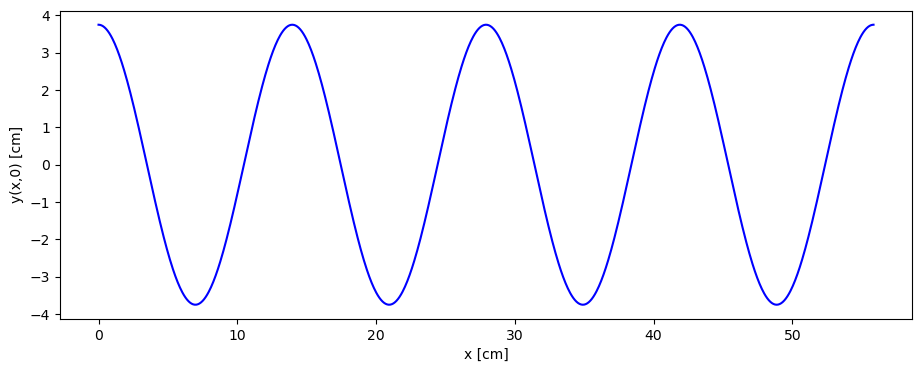

In [7]:
plt.figure(figsize= (11,4))

plt.plot(x, y, "blue")
plt.xlabel('x [cm]')
plt.ylabel('y(x,0) [cm]')


plt.show()

## Peak finding with scipy()

In [8]:
from scipy.signal import find_peaks

In [9]:
peaks, _ = find_peaks(y)
print(peaks)

[250 499 749]


### Wavelength:

In [10]:
L_peaks = x[peaks[1]] - x[peaks[0]]

print("Lambda in [cm]:", L_peaks )

Lambda in [cm]: 13.920704184074895


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_84676/3464780837.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[peaks[1]], y[peaks[1]], 'ro', color = 'red')


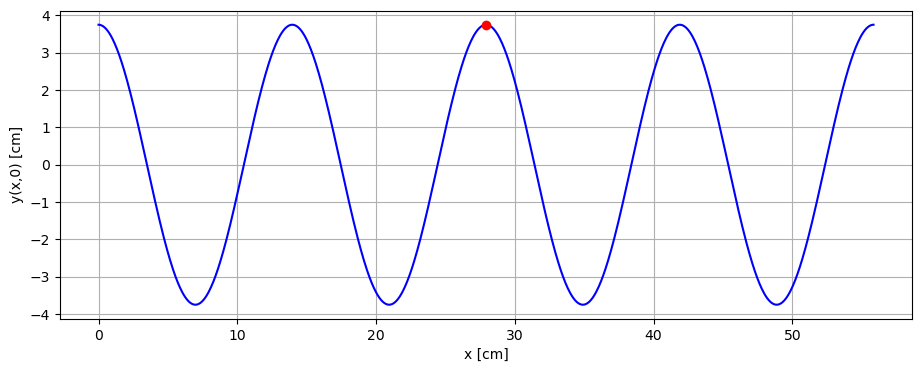

In [12]:
plt.figure(figsize= (11,4))

plt.plot(x, y, "blue")
plt.plot(x[peaks[1]], y[peaks[1]], 'ro', color = 'red')

plt.xlabel('x [cm]')
plt.ylabel('y(x,0) [cm]')

plt.grid()
plt.show()

### For many times:

In [13]:
times = np.arange(0, 5*T_period, T_period/128)

for t in times:
    #print(t)
    
    plt.figure(figsize= (8,6))
    y = wave_function(x, t)
    plt.plot(x, y, "blue")
    plt.plot(x[peaks[1]], y[peaks[1]], 'ro', color = 'red')
    plt.ylabel('y(x,0) [cm]')
    plt.xlabel('x [cm]')
    plt.grid()
    #plt.show() 
    plt.savefig("./wave_xy{:03f}.png".format(t))
    plt.close()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_84676/2652403229.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[peaks[1]], y[peaks[1]], 'ro', color = 'red')


## Animation with Pillow

In [14]:
import glob
from PIL import Image

In [15]:
images_in = "./wave_xy****.png"

gif_image_out = "./wave_xy.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

## Spatial Fourier Transform

In [16]:
# Spatial Fourier Transform of y
F_x = np.fft.fft(y, x.size)

# Norm, so we  have Real numbers
F_norm = np.abs(F_x)

# Spatial Frequencies -> k=2*pi*spatial_frequencies
freqs_x = np.fft.fftfreq(x.size, (4*L_wave)/1000)

print(freqs_x.size, F_norm.size)

1000 1000


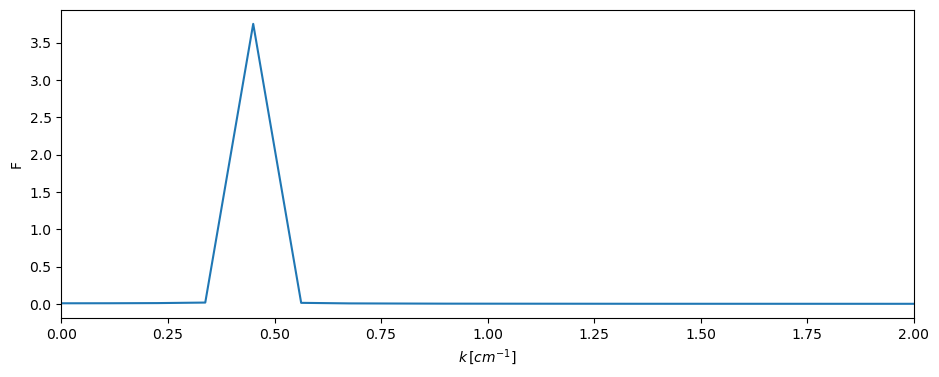

In [27]:
plt.figure(figsize=(11,4))

plt.plot(2*np.pi*freqs_x[0:freqs_x.size//2], (2/F_norm.size)*F_norm[0:F_norm.size//2])

plt.xlim(0,2)

plt.xlabel(r'$k\,[cm^{-1}]$')
plt.ylabel('F')

plt.show()

In [18]:
peaks_time, _ = find_peaks((2/F_norm.size)*F_norm[0:F_norm.size//2])
#print(peaks_time)
print("wavenumber is: ", 2*np.pi*freqs_x[0:freqs_x.size//2][peaks_time])

wavenumber is:  [0.45]


## Time analysis:


At x=0:

In [19]:
time_axis = np.linspace(0, 4*T_period, 1000)

y_t = wave_function(0, time_axis)

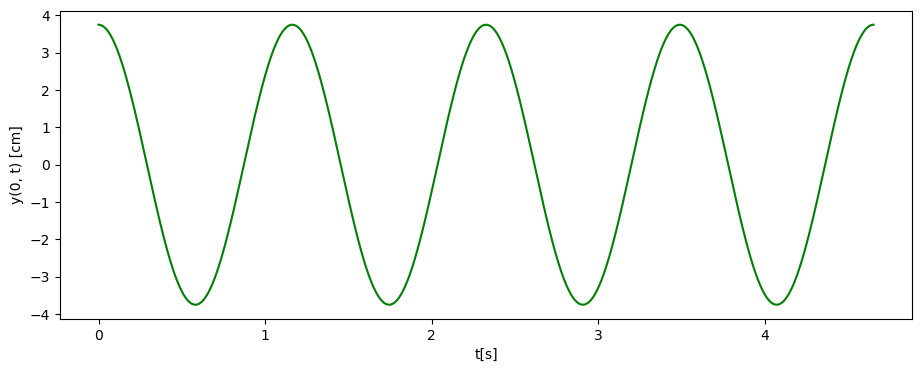

In [20]:
plt.figure(figsize = (11,4))

plt.plot(time_axis, y_t, 'g')

plt.xlabel("t[s]")
plt.ylabel("y(0, t) [cm]")

plt.show()

## Period calculation:

In [21]:
peaks_time, _ = find_peaks(y_t)
print(peaks_time)

[250 499 749]


In [22]:
T_peaks = time_axis[peaks_time[1]] - time_axis[peaks_time[0]]

print("Period in [s]:", T_peaks )

Period in [s]: 1.1600586820062408


## Time evolution of a point initially at x(0).

In [23]:
for i in times:
    plt.figure(figsize = (8,6))

    plt.plot(time_axis, y_t, 'g')
    plt.plot(i, wave_function(0, i), "ro", color= 'black')

    plt.xlabel("t[s]")
    plt.ylabel("y(0, t) [cm]")

    #plt.show()
    plt.savefig("./wave_ty{:03f}.png".format(i))
    plt.close()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_84676/2522357035.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(i, wave_function(0, i), "ro", color= 'black')


## Animation:

In [24]:
images_in = "./wave_ty****.png"

gif_image_out = "./wave_ty.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

## Temporal Fourier Transform

In [25]:
F_t = np.fft.fft(y_t, time_axis.size)

F_tnorm = np.abs(F_t)

freqs_t = np.fft.fftfreq(time_axis.size, (4*T_period)/1000)

print(F_tnorm.size, freqs_t.size)

1000 1000


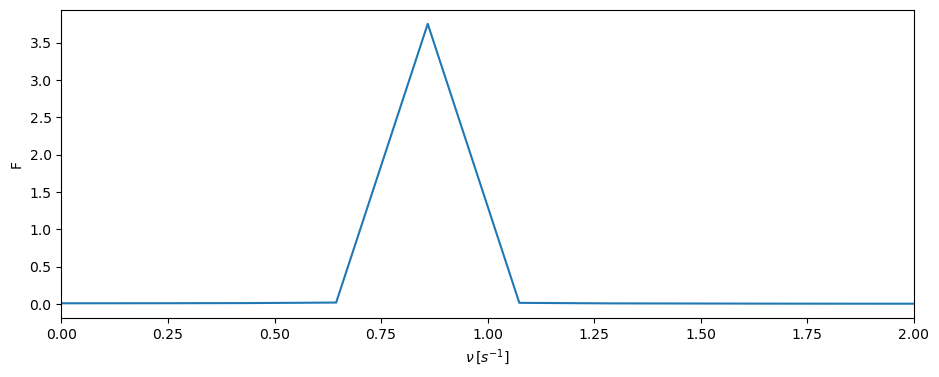

In [26]:
plt.figure(figsize=(11,4))

plt.plot(freqs_t[0:freqs_t.size//2], (2/F_tnorm.size)*F_tnorm[0:F_tnorm.size//2])

plt.xlim(0,2)

plt.xlabel(r'$\nu\,[s^{-1}]$')
plt.ylabel('F')

plt.show()

### Get $\nu$

In [29]:
peaks_time, _ = find_peaks((2/F_tnorm.size)*F_tnorm[0:F_tnorm.size//2])
#print(peaks_time)
print(freqs_t[0:freqs_t.size//2][peaks_time])

[0.85943669]
